<a href="https://colab.research.google.com/github/rishi-29-02/Heart-Failure-Prediction-Flask-Heroku-deployment/blob/main/Heart_Failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rishi Mishra**

# Heart Failure Prediction

## Importing Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

## Load and read the dataset

In [52]:
#from google.colab import files
#uploaded = files.upload()

In [53]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print('Data read successfully')

Data read successfully


In [54]:
data_1 = data.copy()

In [55]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [56]:
data.shape

(299, 13)

The dataset contains 299 instances and 13 features.

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [58]:
data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


The dataset doesn't contain any missing values.

The dataset contains the data of people of age more than 39 years.

In [59]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## Data Visulaization

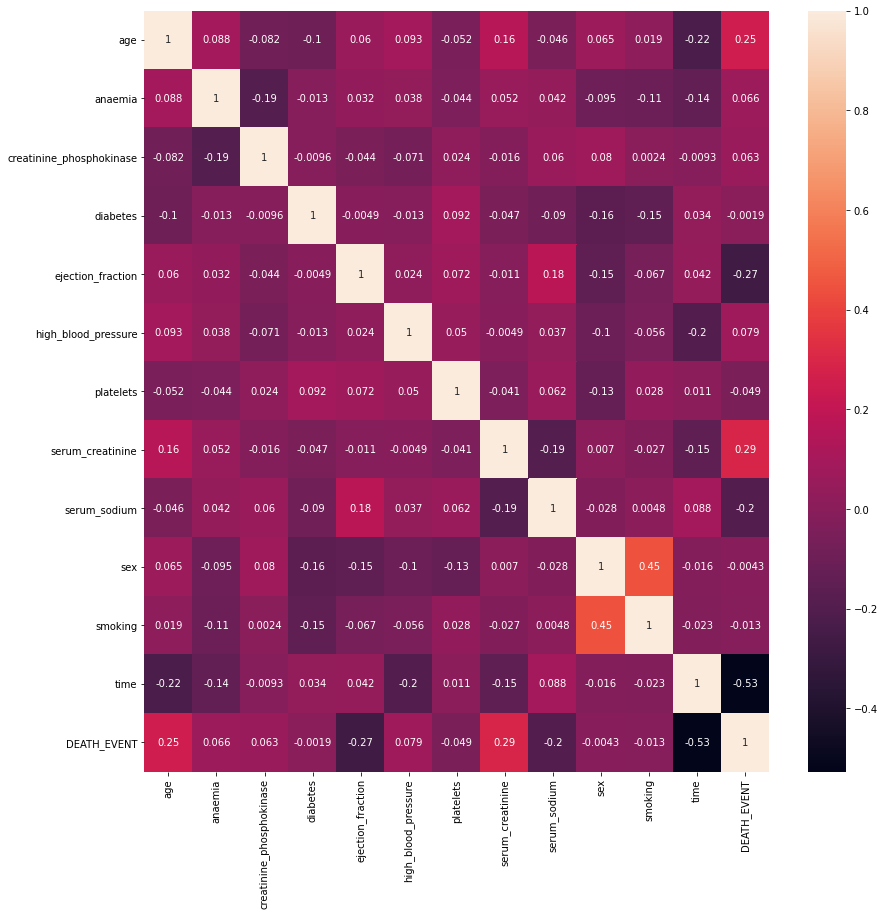

In [60]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True)
plt.show()

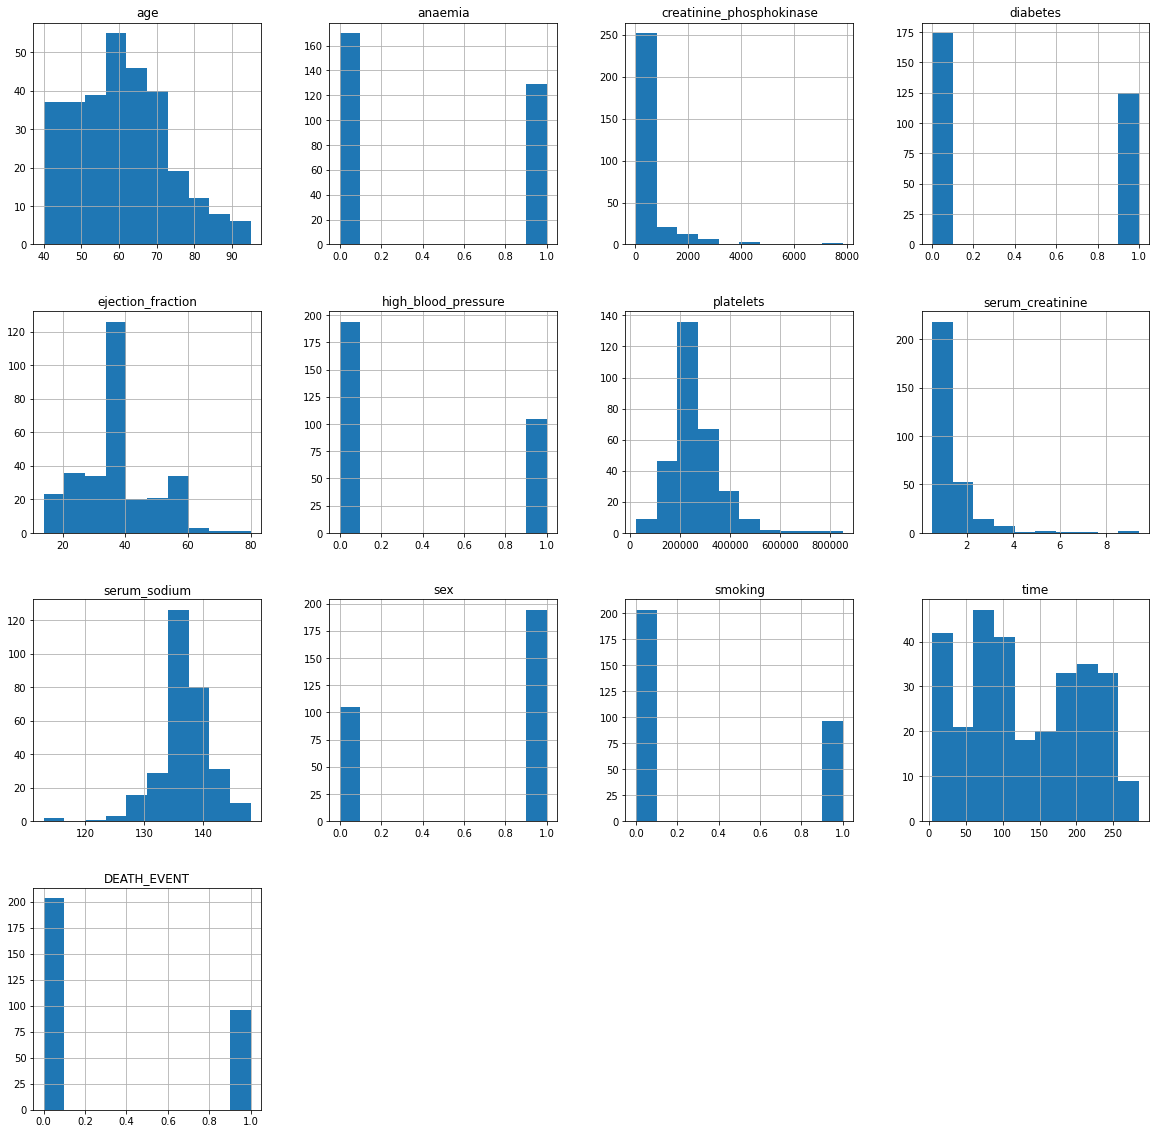

In [61]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca() #get current axis
data.hist(ax=ax)
plt.show()

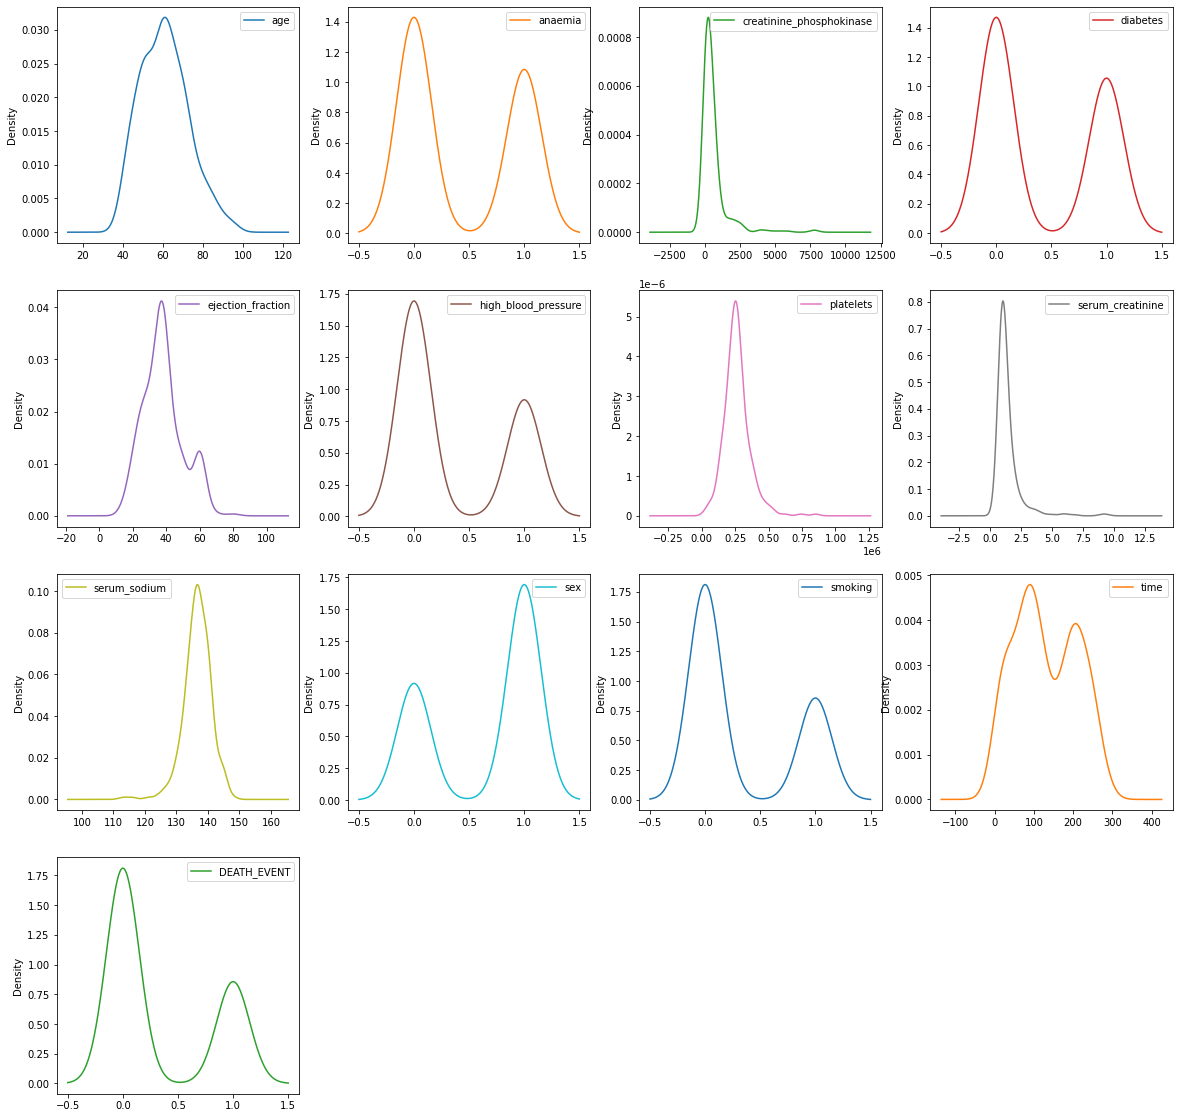

In [62]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

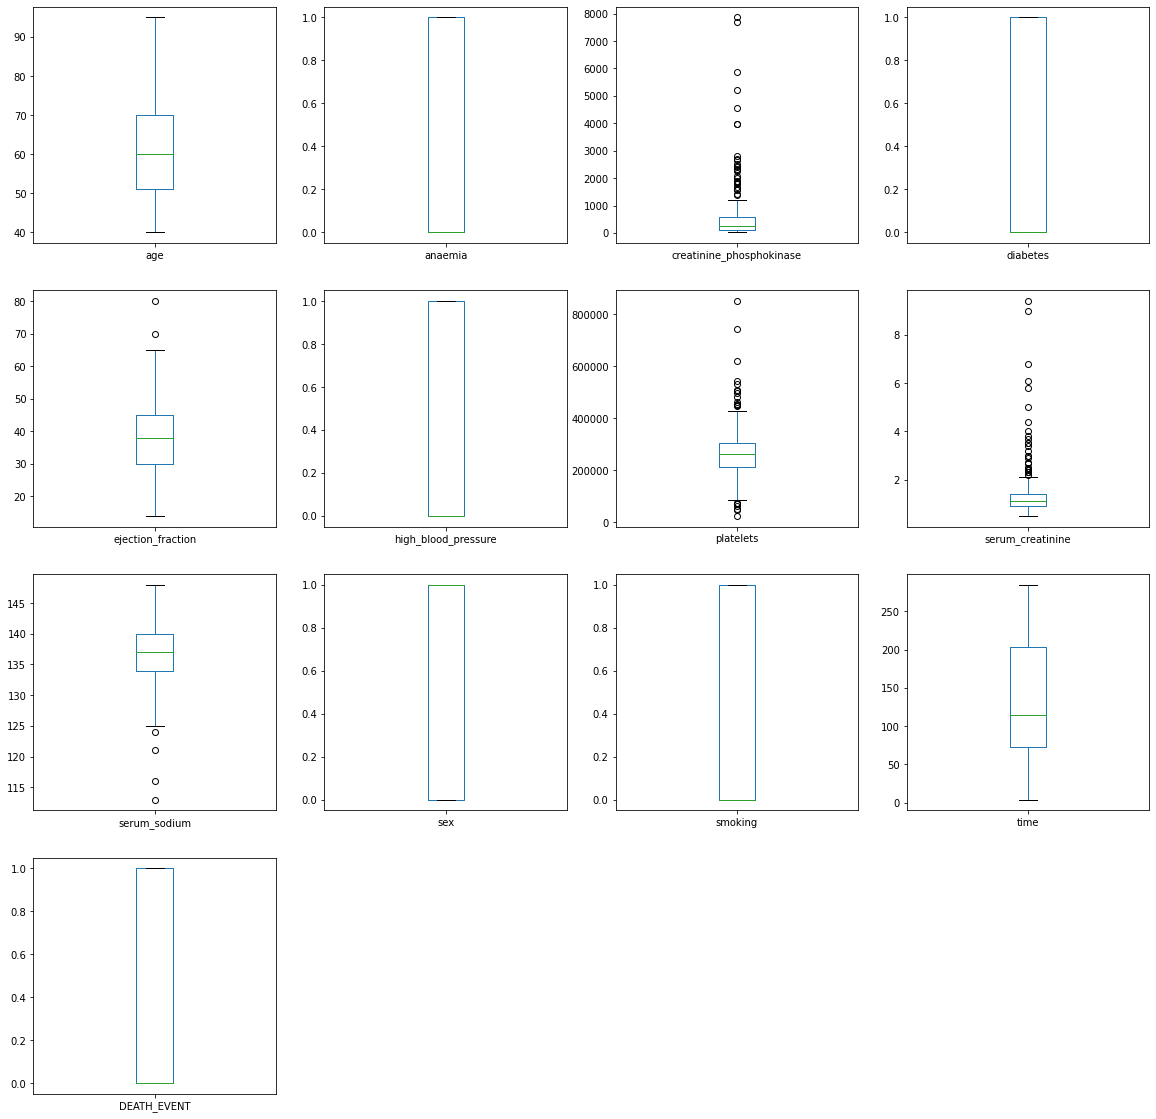

In [63]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

**Age**

In [64]:
bins = [40, 60, 80, np.nan]
labels = ['Adults', 'Senior', 'Super_Senior']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Senior
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Adults
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Senior
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Adults
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Senior


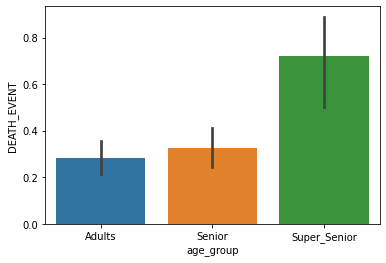

In [65]:
sns.barplot(x='age_group', y='DEATH_EVENT', data=data)
plt.show()

In [66]:
print('Percentage of Super Senior people lose their life :', data['DEATH_EVENT'][data['age_group']=='Super_Senior'].value_counts(normalize=True)[1]*100)

Percentage of Super Senior people lose their life : 72.22222222222221


People whose age is more than 80 yrs are more prone to heart failure. 

**Anaemia: Decrease of red blood cells or hemoglobin**	

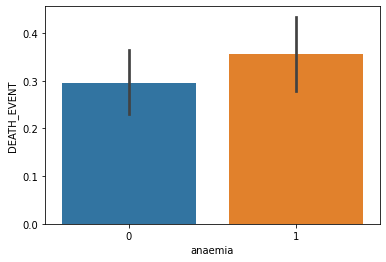

In [67]:
sns.barplot(x='anaemia', y='DEATH_EVENT', data=data)
plt.show()

People who have Anaemia are more prone to heart Failure.

**creatinine_phosphokinase : Level of the CPK enzyme in the blood**

Total CPK normal values: 10 to 120 micrograms per liter (mcg/L)

In [68]:
bins = [10, 120, np.nan]
labels = ['Normal','Abnormal']
data['creatinine_phosphokinase_group'] = pd.cut(data['creatinine_phosphokinase'], bins=bins, labels=labels)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,creatinine_phosphokinase_group
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Senior,Abnormal
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Adults,Abnormal
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Senior,Abnormal
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Adults,Normal
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Senior,Abnormal


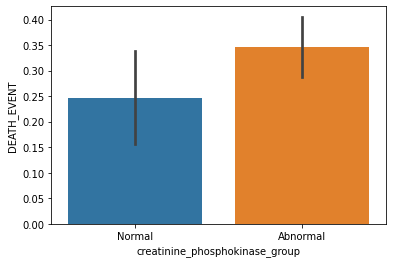

In [69]:
sns.barplot(x='creatinine_phosphokinase_group', y='DEATH_EVENT', data=data)
plt.show()

People who have abnormal level of the CPK enzyme in the blood are more prone to heart Failure.

**Diabetes**

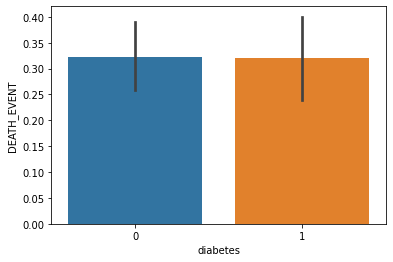

In [70]:
sns.barplot(x='diabetes', y='DEATH_EVENT', data=data)
plt.show()

In [71]:
print(data['DEATH_EVENT'][data['diabetes']==1].value_counts(normalize=True))

0    0.68
1    0.32
Name: DEATH_EVENT, dtype: float64


In [72]:
print(data['DEATH_EVENT'][data['diabetes']==0].value_counts(normalize=True))

0    0.678161
1    0.321839
Name: DEATH_EVENT, dtype: float64


Having diabetes doesn't matter to the heart failure.

Moreover from the heatmap we get that the correlation between Death event and diabetes is very less i.e -0.001943 
 

**ejection_fraction : Percentage of blood leaving the heart at each contraction**

In [73]:
bins = [0, 41, 50, 70, np.nan]
labels = ['too low', 'borderline', 'Normal', 'high']
data['ejection_fraction_category'] = pd.cut(data['ejection_fraction'], bins=bins, labels=labels)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,creatinine_phosphokinase_group,ejection_fraction_category
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Senior,Abnormal,too low
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Adults,Abnormal,too low
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Senior,Abnormal,too low
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Adults,Normal,too low
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Senior,Abnormal,too low


In [74]:
data['ejection_fraction_category'].value_counts()

too low       219
borderline     41
Normal         38
high            1
Name: ejection_fraction_category, dtype: int64

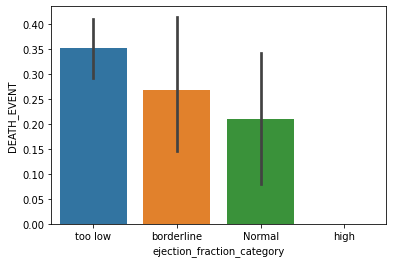

In [75]:
sns.barplot(x='ejection_fraction_category', y='DEATH_EVENT', data=data)
plt.show()

In [76]:
data['DEATH_EVENT'][data['ejection_fraction_category']=='too low'].value_counts(normalize=True)*100

0    64.840183
1    35.159817
Name: DEATH_EVENT, dtype: float64

If person's ejection_fraction is in the too low category then they have more chances of Heart Failure.

**high_blood_pressure**

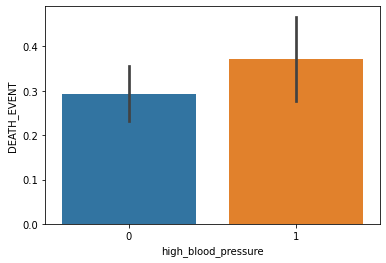

In [77]:
sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', data=data)
plt.show()

In [78]:
print('Percentage of people resulted in Heart Failure having high blood pressure : ', 
      data['DEATH_EVENT'][data['high_blood_pressure']==1].value_counts(normalize=True)[1]*100)

Percentage of people resulted in Heart Failure having high blood pressure :  37.142857142857146


The person having high blood pressure is more to heart failure.

**platelets : Platelets in the blood (kiloplatelets/mL)**

In [79]:
bins =[0, 150000, 250000, np.nan]
labels =['low', 'normal', 'high']
data['platelets_category'] = pd.cut(data['platelets'], bins=bins, labels=labels)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,creatinine_phosphokinase_group,ejection_fraction_category,platelets_category
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Senior,Abnormal,too low,high
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Adults,Abnormal,too low,high
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Senior,Abnormal,too low,normal
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Adults,Normal,too low,normal
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Senior,Abnormal,too low,high


In [80]:
data['platelets_category'].value_counts()

high      164
normal    107
low        28
Name: platelets_category, dtype: int64

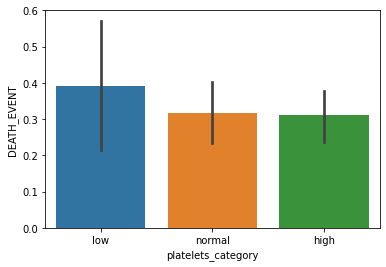

In [81]:
sns.barplot(x='platelets_category', y='DEATH_EVENT', data=data)
plt.show()

The people with low blood platelets are more prone to Heart Failure.

**serum_creatinine	: Level of serum creatinine in the blood (mg/dL)**

In [82]:
bins= [0, 0.74, 1.35, np.nan]
labels=['low', 'normal', 'high']
data['serum_creatinine_category'] = pd.cut(data['serum_creatinine'], bins=bins, labels=labels)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,creatinine_phosphokinase_group,ejection_fraction_category,platelets_category,serum_creatinine_category
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Senior,Abnormal,too low,high,high
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Adults,Abnormal,too low,high,normal
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Senior,Abnormal,too low,normal,normal
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Adults,Normal,too low,normal,high
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Senior,Abnormal,too low,high,high


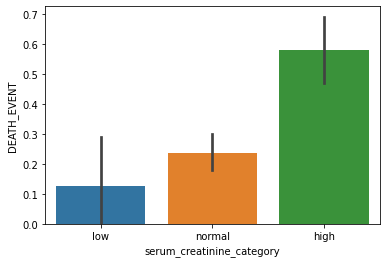

In [83]:
sns.barplot(x='serum_creatinine_category', y='DEATH_EVENT', data=data)
plt.show()

Thus people with more serum_creatinine is more prone to heart failure.

**serum_sodium : Level of serum sodium in the blood (mEq/L)**

In [84]:
bins=[0, 135, 145, np.nan]
labels=['low', 'normal', 'high']
data['serum_sodium_category'] = pd.cut(data['serum_sodium'], bins=bins, labels=labels)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,creatinine_phosphokinase_group,ejection_fraction_category,platelets_category,serum_creatinine_category,serum_sodium_category
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,Senior,Abnormal,too low,high,high,low
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,Adults,Abnormal,too low,high,normal,normal
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,Senior,Abnormal,too low,normal,normal,low
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,Adults,Normal,too low,normal,high,normal
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,Senior,Abnormal,too low,high,high,low


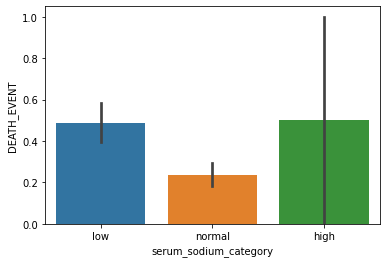

In [85]:
sns.barplot(x='serum_sodium_category', y='DEATH_EVENT', data=data)
plt.show()

Those people whose serum sodium is not normal are prone heart failure.

**Sex**

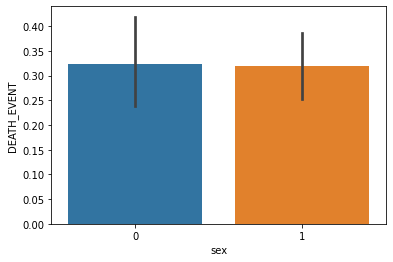

In [86]:
sns.barplot(x='sex', y='DEATH_EVENT', data=data)
plt.show()

Sex has no realtion to the death event. It doesn't matter whether one is male of feamle.

Moreover from the heatmap correlation in between death_event and sex is -0.004316.

**Smoking**

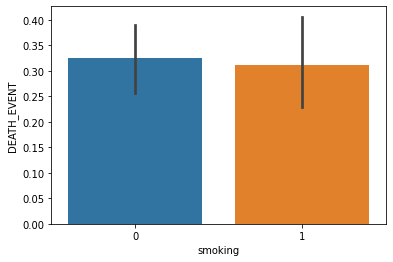

In [87]:
sns.barplot(x='smoking', y='DEATH_EVENT', data=data)
plt.show()

Smoking has no realtion to the death event. It doesn't matter whether one smoke or not.

Moreover from the heatmap correlation in between death_event and smoking is -0.012623.

## Seperating the Dataset

In [88]:
array = data_1.values
X = array[:, :12]
Y = array[:, 12]

## Splitting the data into training and testing

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.67, random_state=1)

## Rescale the Data

In [90]:
# Standard Scalar
scalar = StandardScaler()
rescaled_X = scalar.fit_transform(x_train)

In [91]:
rescaled_X[:5]

array([[-0.24551621,  1.13095967,  1.51464342,  1.28399714,  0.04496884,
        -0.81302949,  0.2879158 , -0.3726744 ,  0.84019006, -1.37198868,
        -0.66421116,  0.79189932],
       [-0.24551621,  1.13095967, -0.51530291, -0.77881794, -1.58723367,
        -0.81302949, -0.49111079, -0.633982  ,  0.43755619,  0.72886899,
         1.50554531, -0.6772304 ],
       [ 0.01888586,  1.13095967,  1.0475922 , -0.77881794,  0.45301947,
        -0.81302949, -1.78291436, -0.633982  ,  0.03492233,  0.72886899,
        -0.66421116,  0.77901221],
       [ 0.19515391, -0.88420483, -0.45078806, -0.77881794,  0.8610701 ,
        -0.81302949, -0.58972175, -0.28557187,  1.6454578 ,  0.72886899,
         1.50554531,  0.95943165],
       [-0.24551621, -0.88420483, -0.32811896, -0.77881794, -0.36308178,
        -0.81302949,  0.24847141,  0.23704332,  0.63887313,  0.72886899,
        -0.66421116,  1.60378679]])

## Feature Seletion

In [92]:
# Recursive Feature Elimination

model = LogisticRegression()
rfe = RFE(model, 6)
fit = rfe.fit(rescaled_X, y_train)

In [93]:
print(data_1.columns)
print('Num features : ', fit.n_features_)
print('Selected features : ', fit.support_)
print('Features ranking : ', fit.ranking_)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Num features :  6
Selected features :  [ True  True False False  True False False  True  True False False  True]
Features ranking :  [1 1 2 6 1 5 4 1 1 3 7 1]


The selected features : 
Age, anaemia, ejection fraction, serum_creatinine, serum_sodium, time

In [94]:
transformed_X = fit.transform(rescaled_X)
transformed_X[:5]

array([[-0.24551621,  1.13095967,  0.04496884, -0.3726744 ,  0.84019006,
         0.79189932],
       [-0.24551621,  1.13095967, -1.58723367, -0.633982  ,  0.43755619,
        -0.6772304 ],
       [ 0.01888586,  1.13095967,  0.45301947, -0.633982  ,  0.03492233,
         0.77901221],
       [ 0.19515391, -0.88420483,  0.8610701 , -0.28557187,  1.6454578 ,
         0.95943165],
       [-0.24551621, -0.88420483, -0.36308178,  0.23704332,  0.63887313,
         1.60378679]])

## Spot checking Algorithms

In [95]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('ETC', ExtraTreesClassifier()))

In [96]:
# evaluate each model
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10, random_state=1)
  cv_results = cross_val_score(model, transformed_X, y_train,cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print(name, ':', cv_results.mean()*100)

LR : 84.88888888888889
LDA : 89.0
KNN : 79.66666666666666
SVM : 88.00000000000001
GNB : 82.55555555555554
ETC : 82.66666666666667


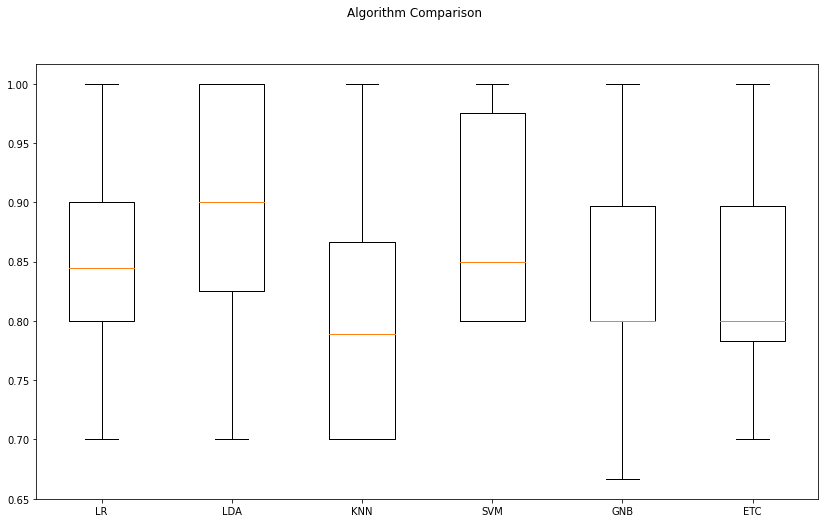

In [97]:
# compare Algorithms
fig = plt.figure(figsize=(14, 8))
fig.suptitle('Algorithm Comparison')
ax =fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Thus Linear Discriminant Analysis comes out to be the best model with accuracy of 89%.

# Building the model

In [98]:
steps = [('scaler', StandardScaler()),
         ('RFE', RFE(LogisticRegression(), 6)),
         ('lda', LinearDiscriminantAnalysis())]

pipeline = Pipeline(steps)
pipeline.fit(x_train, y_train)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('RFE',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=100,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=6, step=1, verbose=0)),
                ('lda',
                 LinearDiscri

In [99]:
predictions = pipeline.predict(x_test)
predictions

array([0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.])

In [100]:
print('The accurcay score of the test dataset : ', accuracy_score(y_test, predictions))
print('\nThe confusion matrix : \n', confusion_matrix(y_test, predictions))
print('\nFinally the classification report : \n', classification_report(y_test, predictions))
print('Score : ', pipeline.score(x_test, y_test))

The accurcay score of the test dataset :  0.7860696517412935

The confusion matrix : 
 [[120  15]
 [ 28  38]]

Finally the classification report : 
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85       135
         1.0       0.72      0.58      0.64        66

    accuracy                           0.79       201
   macro avg       0.76      0.73      0.74       201
weighted avg       0.78      0.79      0.78       201

Score :  0.7860696517412935


## Save the Model 

In [101]:
pickle.dump(pipeline, open('model.pkl', 'wb'))

# load the model to compare the results
model = pickle.load(open('model.pkl', 'rb'))
predictions = model.predict(x_test)
print(predictions)

[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 0.]
